In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy.sparse as sparse
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import call
from sklearn.metrics import mean_squared_error
df = pd.read_csv("C:/Users/Carla/Documents/Untitled Folder/AMLAS/ml-latest-small/ml-latest-small/ratings.csv")
from math import sqrt
from tqdm import tqdm
movieList = pd.read_csv("C:/Users/Carla/Documents/Untitled Folder/AMLAS/ml-latest-small/ml-latest-small/movies.csv")
movieTags = pd.read_csv("C:/Users/Carla/Documents/Untitled Folder/AMLAS/ml-latest-small/ml-latest-small/tags.csv")

In [2]:
uniqueMovies = df["movieId"].unique()

data = np.zeros((uniqueMovies.shape[0],2))

for i in range(uniqueMovies.shape[0]):
    data[i,0] = int(i)
    data[i,1] = uniqueMovies[i]
    
    
movieData = pd.DataFrame(data, columns = ['newId', 'movieId'])


def MovieIndx(df,id):
    x = df.loc[df["movieId"] == id]
    y = x.iat[0,0]
    return y

def queryUser(df,id):
    
    return df.loc[df["userId"] == id]


def queryMovie(df,id):
    
    
    return df.loc[df["movieId"] == id]

def revMovieIndx(df,id):
    x = df.loc[df["newId"] == id]
    y = x.iat[0,1]

    return y

def getMovieName(movieId,df):
    x = df.loc[df["movieId"] == movieId]
    
    return x.title

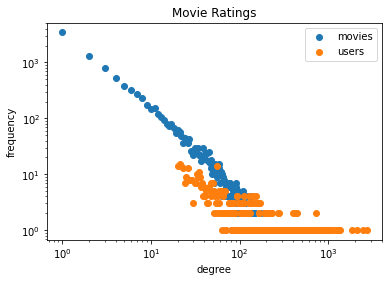

In [3]:
userFreqRatings = np.zeros(len(uniqueMovies))
ones = 0
mans = 0
for i in range(len(uniqueMovies)):
    
    Index = int(revMovieIndx(movieData,i))
    userFreqRatings[i] = len(df[df.movieId==Index])
    if len(df[df.movieId==Index]) == 1:
        ones = ones +1
        
    if len(df[df.movieId==Index]) > 200:
        mans = mans +1
        
    
    
arr = userFreqRatings
# initializing dict to store frequency of each element
elements_count = {}
# iterating over the elements for frequency
for element in arr:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
# for key, value in elements_count.items():
#    print(f"{key}: {value}")

plt.scatter(*zip(*sorted(elements_count.items())),label = "movies")
plt.yscale('log')
plt.xscale('log')
plt.title("Movie Ratings")
plt.ylabel("frequency")
plt.xlabel("degree")
# plt.show()

elements_count
movieFreqRatings = np.zeros(len(df["userId"].unique()))

for i in range(len(df["userId"].unique())):
    
    Index = i+1
    movieFreqRatings[i] = len(df[df.userId==Index])
    
    
    
arr = movieFreqRatings
# initializing dict to store frequency of each element
elements_count = {}
# iterating over the elements for frequency
for element in arr:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
# for key, value in elements_count.items():
#    print(f"{key}: {value}")


plt.scatter(*zip(*sorted(elements_count.items())),label = "users")
# plt.yscale('log')
# plt.xscale('log')
# plt.ylabel("frequency")
# plt.xlabel("degree")
# plt.title("Movie Ratings")
plt.legend()
fig1 = plt.gcf()
plt.show()

fig1.savefig("powerLaw.png")


# optional 2-D plot of latent vectors
# movieNames = []

# for i in range(12):
#     x = revMovieIndx(movieData,i)
#     print(x)   

#     movieNames = np.append(movieNames,getMovieName(x,movieList))
        
# plt.rcParams['figure.figsize'] = [10, 10]
# for i in range(12):
 
    
#         x = mf[0,i]
#         y = mf[1,i]
    
        
#         plt.plot(x, y, 'bo')
#         plt.ylabel("x2")
#         plt.xlabel("x1")
#         plt.title("2-Dimensional mapping of the latent variables")
# #     plt.text(x * (1 + 0.01), y * (1 + 0.01) , movieNames[i], fontsize=12)
#         if (i != 5 and i != 8 ):
#             plt.text(x+0.03 , y+0.03  , movieNames[i], fontsize=10)
#         if(i == 5):
#             plt.text(x-0.52 , y+0.05  , movieNames[i], fontsize=10)
#         if(i == 8):
#             plt.text(x-0.2 , y+0.03  , movieNames[i], fontsize=10)


In [4]:
train = df
train

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
def fit(train,n_factors,n_iters,movieData):
    
    
 
    lambda_1 = 1
    tau = 0.01
    
    n_users, n_movies = len(train["userId"].unique()),len(train["movieId"].unique())
    user_factors = np.random.normal(0,sqrt(lambda_1),size = (n_factors,n_users))
    movie_factors = np.random.normal(0,sqrt(lambda_1),size = (n_factors,n_movies))
    
    user_bias = np.zeros(n_users)
    movie_bias = np.zeros(n_movies)
    
    mse_record = []
    
    its = 0
    
    for i in range(n_iters):
        
        user_factors, user_bias = updateUsers(train,movie_factors,movie_bias, user_factors,lambda_1,tau,movieData)
        movie_factors, movie_bias = updateMovies(train,user_factors,user_bias,movie_factors,lambda_1,tau,movieData)
        

        train_mse = error(train,user_factors,movie_factors,user_bias,movie_bias,movieData)
        mse_record = np.append(mse_record,train_mse)

        its = its + 1


    return mse_record,user_factors,movie_factors,user_bias,movie_bias


   
def updateUsers(df,movie_factors,movie_bias, user_factors,lmda,tau,movieData):
    
    
    I = np.eye(user_factors.shape[0]+1)
    I[-1,-1] = 0.0001
    
    ones = np.ones((1,movie_factors.shape[1]))
  

    y = movie_factors
    y = np.vstack((y,np.atleast_2d(ones)))

    
    z = np.zeros((user_factors.shape[0]+1,user_factors.shape[1]))

    # Loop over all users
    
    for i in range(user_factors.shape[1]):
        H = tau/lmda*I
        userData = queryUser(df, i+1)
        new_user = False
        sum = 0
        for row in userData.itertuples(index = False):
        
            index = int(MovieIndx(movieData,row.movieId))
            if new_user == False:
            
                y_user = y[:,index].reshape((movie_factors.shape[0]+1,1))
                new_user = True
            y_user = np.hstack((y_user,y[:,index].reshape((movie_factors.shape[0]+1,1))))
            x = row.rating - movie_bias[index]
            sum = sum + x*y[:,index]
    
        H = y_user@y_user.T + H
        H_inv = np.linalg.inv(H)
        b = sum 
        new_vec = H_inv@b
        z[:,i] = new_vec
    
    
    user_factors = z[0:z.shape[0]-1,:]
    user_bias = z[z.shape[0]-1,:]    

    return user_factors,user_bias          


def updateMovies(df,user_factors,user_bias, movie_factors,lmda,tau,movieData):
    
    
    I = np.eye(user_factors.shape[0]+1)
    I[-1,-1] = 0.0001
    
    ones = np.ones((1,user_factors.shape[1]))
  

    y = user_factors
    y = np.vstack((y,np.atleast_2d(ones)))

    
    z = np.zeros((movie_factors.shape[0]+1,movie_factors.shape[1]))

    # Loop over all users
    
    for i in range(movie_factors.shape[1]):
        H = tau/lmda*I
        movie_ind = revMovieIndx(movieData,i)
        movie_data = queryMovie(df, movie_ind)
        new_movie = False
        sum = 0
        for row in movie_data.itertuples(index = False):
            index = int(row.userId)
            if new_movie == False:
            
                y_movie = y[:,index -1].reshape((movie_factors.shape[0]+1,1))
                new_movie = True
            y_movie = np.hstack((y_movie,y[:,index-1].reshape((movie_factors.shape[0]+1,1))))
            x = row.rating - user_bias[index-1]
            sum = sum + x*y[:,index-1]
    
        H = y_movie@y_movie.T + H
        H_inv = np.linalg.inv(H)
        b = sum 
        new_vec = H_inv@b
        z[:,i] = new_vec
    
    
    movie_factors = z[0:z.shape[0]-1,:]
    movie_bias = z[z.shape[0]-1,:]    

    return movie_factors,movie_bias   

def error(df,user_factors,movie_factors,user_bias,movie_bias,movieData):
    
    error =0
    c = 0
    for row in df.itertuples(index = False):
        
        y_true = row.rating
        user = row.userId-1
        movie = int(MovieIndx(movieData,row.movieId))
        
        y_pred = user_factors[:,user].T@movie_factors[:,movie] + movie_bias[movie] + user_bias[user]
        
        error = error + (y_true - y_pred)**2
        c = c +1
    rmse = sqrt((1/c)*error)
    
    return rmse


def createreco(userId,user_factors,movie_factors,df,movieData,movieList,movie_bias,user_bias):

    
    
    list = user_factors[:,userId-1].T@movie_factors
    list = np.reshape(list,(1,movie_factors.shape[1]))
    list = list + user_bias[userId-1]
    movieIds = np.zeros(8)
    
    for i in range(movie_factors.shape[1]):
        
        list[0,i] = list[0,i] + movie_bias[i]
        

    userList = df[df.userId == userId]  

    for row in userList.itertuples(index=False):
        index = int(MovieIndx(movieData,row.movieId))
        list[0,index] = 0
                    
  
    sort_index = np.argsort(list)
    topFive = sort_index[0,-8:]
    recList = []
    for i in range(len(topFive)):
        ind = int(topFive[i])
        x = revMovieIndx(movieData,ind)
        print(x)
        movieIds[i] = x
        movieName = getMovieName(x,movieList)
        movieGenres = movieList.genres[movieList.movieId == x]
        movieSum = [movieName ,movieGenres]
        recList = np.append(recList,movieSum)
        
    return recList, movieIds
        
def checkPref(df,userId,movieList):
    
    userList = df[df.userId == userId]
    sortedList = userList.sort_values("rating")
    topFive = sortedList.tail(10)
    recList = []
    movieIds = np.zeros(10)
    i = 0
    
    for row in topFive.itertuples(index = False):
        
        
            movieIds[i] = int(row.movieId)
            movieName = getMovieName(row.movieId,movieList)
            movieGenres = movieList.genres[movieList.movieId == row.movieId]
            movieSum = [movieName ,movieGenres]
            recList = np.append(recList,movieSum)
            i = i+1
    return recList,movieIds

In [6]:
def printMovies(Mlist):
  
    print("movie recommendations:")
    print("-------------------------")
  
    for i in range(len(Mlist)):
        if i%2 ==0:
            print("movieName: ", Mlist[i])
        
        else:
            print("movieGenres: " , Mlist[i])
            print('\n')
    print('\n')
    

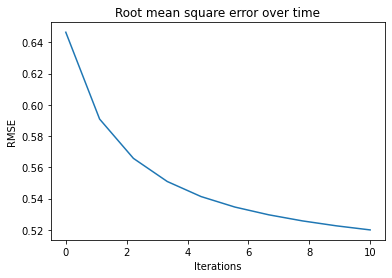

In [7]:
# train model and plot rmse

mse,uf,mf,ub,mb = fit(train,10,10,movieData)
x =np.linspace(0,10,10)
plt.ylabel("RMSE")
plt.xlabel("Iterations")
plt.title("Root mean square error over time")
plt.plot(x,mse)

In [8]:

recs,ids = createreco(10,uf,mf,train,movieData,movieList,mb,ub)

printMovies(recs)
print(ids)


179819.0
1974.0
5055.0
2328.0
87485.0
6993.0
2013.0
46965.0
movie recommendations:
-------------------------
movieName:  Star Wars: The Last Jedi (2017)
movieGenres:  Action|Adventure|Fantasy|Sci-Fi


movieName:  Friday the 13th (1980)
movieGenres:  Horror|Mystery|Thriller


movieName:  Dragon: The Bruce Lee Story (1993)
movieGenres:  Action|Drama


movieName:  Vampires (1998)
movieGenres:  Horror|Western


movieName:  Bad Teacher (2011)
movieGenres:  Comedy


movieName:  Hannah and Her Sisters (1986)
movieGenres:  Comedy|Drama|Romance


movieName:  Poseidon Adventure, The (1972)
movieGenres:  Action|Adventure|Drama


movieName:  Snakes on a Plane (2006)
movieGenres:  Action|Comedy|Horror|Thriller




[179819.   1974.   5055.   2328.  87485.   6993.   2013.  46965.]


In [9]:
# function to log future user feedback

def logUserFeedback(userId,movieId,rating,versionId):
    
    from csv import writer
    with open('newRatings.csv', 'a',newline='') as f_object:  
    
        data = [userId,movieId,rating,versionId]
        
        
        
        writer_object = writer(f_object)
    
    
        writer_object.writerow(data)  
    
        f_object.close()
    